### Install required packages

In [26]:
import glob as glob
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy as np

### Get the relevant filenames

In [17]:
ddir = '/nfs/a319/gy17m2a/PhD/datadir/UKCP18_hourly/pr*'
filenames = []
for filename in glob.glob(ddir):
    filenames.append(filename)
print(f"loading {len(filenames)} files")
filename

loading 2 files


'/nfs/a319/gy17m2a/PhD/datadir/UKCP18_hourly/pr_rcp85_land-cpm_uk_5km_01_1hr_19810101-19810130.nc'

### Load in the filenames with Iris

In [18]:
monthly_cubes_list = iris.load(filenames)
print(len(monthly_cubes_list))

2


### Get rid of conflicting metadata (that stops the files being able to join)

In [20]:
for cube in monthly_cubes_list:
     for attr in ['creation_date', 'tracking_id', 'history', 'Conventions']:
            if attr in cube.attributes:
                del cube.attributes[attr]

### Join the separate monthly files of data into one cube

In [61]:
model_cube = monthly_cubes_list.concatenate_cube()      

### Remove ensemble member dimension

In [62]:
if len(model_cube.shape)>3:
    model_cube = model_cube[0,:,:,:]

### Inspect the cube

In [63]:
model_cube

Lwe Precipitation Rate (mm/hour),time,projection_y_coordinate,projection_x_coordinate
Shape,1440,244,180
Dimension coordinates,,,
time,x,-,-
projection_y_coordinate,-,x,-
projection_x_coordinate,-,-,x
Auxiliary coordinates,,,
month_number,x,-,-
year,x,-,-
yyyymmddhh,x,-,-
latitude,-,x,x


## Check plotting of one timeslice (spatially)

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/iris/coord_systems.py:531: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  globe=globe,


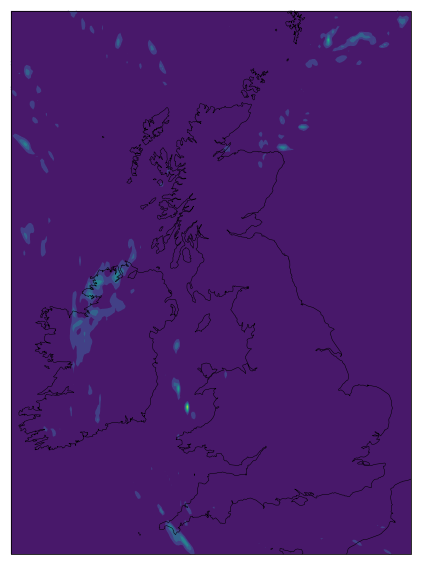

In [28]:
fig,ax=plt.subplots(figsize=(10,10))
iplt.contourf(model_cube[10])
plt.gca().coastlines(resolution='10m', color='black', linewidth=0.5);

### Check plotting for one grid cell, the whole timeseries

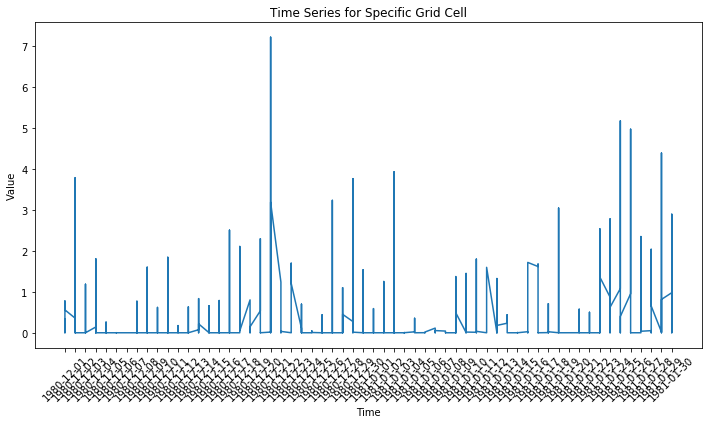

In [43]:
# Assuming 'cube' is your Iris cube
# Assuming you know the indices lat_idx and lon_idx for your grid cell of interest

# Extract the time series for the specific grid cell
time_series = model_cube[:, 0,0].data
time_coord = model_cube.coord('time')
times = time_coord.units.num2date(time_coord.points) 

time_strings = [date.strftime('%Y-%m-%d') for date in times]

plt.figure(figsize=(10, 6))
plt.plot(time_strings, time_series,  linestyle='-')  # Use date strings as x-axis

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series for Specific Grid Cell')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Mask data to UK/GB

In [48]:
gb_mask = np.load("/nfs/a319/gy17m2a/PhD/datadir/UKCP18_5km_GB_Mask.npy")
uk_mask = np.load("/nfs/a319/gy17m2a/PhD/datadir/UKCP18_5km_UK_Mask.npy")

### TO GB

In [57]:
# APPLY THE MASK
reshaped_mask = np.tile(gb_mask, (model_cube.shape[0], 1, 1))
reshaped_mask = reshaped_mask.astype(int)
reversed_array = ~reshaped_mask.astype(bool)

# Mask the cube
masked_cube_GB = model_cube.copy()
masked_cube_GB = iris.util.mask_cube(masked_cube_GB, reversed_array)

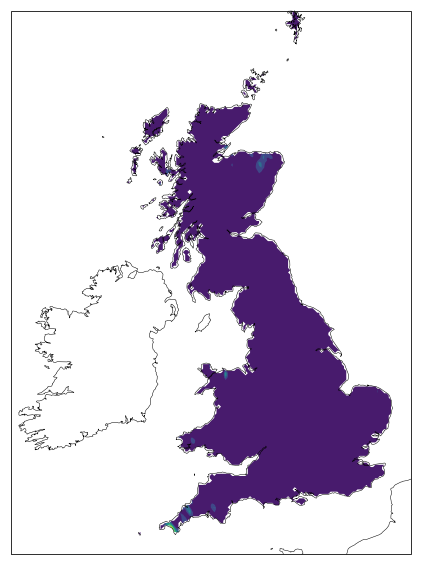

In [58]:
fig,ax=plt.subplots(figsize=(10,10))
### Check the mask
iplt.contourf(masked_cube_GB[10])
plt.gca().coastlines(resolution='10m', color='black', linewidth=0.5);

### TO UK

In [59]:
# APPLY THE MASK
reshaped_mask = np.tile(uk_mask, (model_cube.shape[0], 1, 1))
reshaped_mask = reshaped_mask.astype(int)
reversed_array = ~reshaped_mask.astype(bool)

# Mask the cube
masked_cube_UK = model_cube.copy()
masked_cube_UK = iris.util.mask_cube(masked_cube_UK, reversed_array)

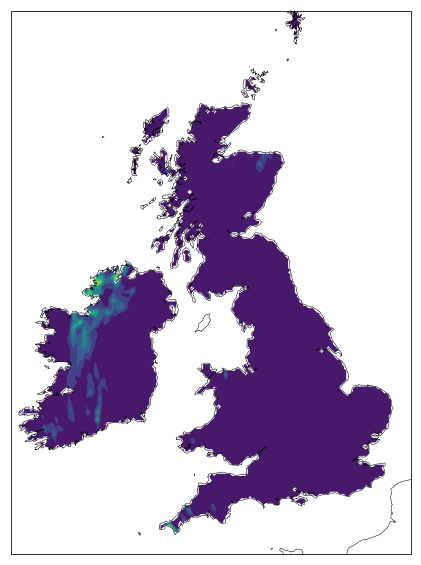

In [60]:
fig,ax=plt.subplots(figsize=(10,10))
### Check the mask
iplt.contourf(masked_cube_UK[10])
plt.gca().coastlines(resolution='10m', color='black', linewidth=0.5);